# Data Mining Portfolio

## Project Overview
Brief description of the business problem and objective.

## Stage 1: Problem Definition and Data Scoping

### Business Problem

Customer churn is a significant challenge for telecom service providers, as acquiring new customers is typically more costly than retaining existing ones. UK telecom operators such as Three UK, EE, and Vodafone operate in a highly competitive market where customers can switch providers easily due to short-term contracts and similar pricing structures. As a result, the ability to identify customers who are at risk of leaving is critical for improving customer retention and protecting recurring revenue.

### Data Mining Objective

The objective of this project is to develop a predictive model that can identify customers who are likely to churn based on their historical service usage, contract details, and billing information. This is framed as a binary classification problem, where the output variable indicates whether a customer churns or remains with the service.

### Dataset Selection and Justification

This study uses a publicly available telecom customer churn dataset sourced from Kaggle, originally provided by IBM. The dataset contains detailed customer-level information including tenure, contract type, monthly charges, payment method, subscribed services, and a churn indicator. Although the dataset does not originate from a specific UK provider, it closely reflects the characteristics of customers in the UK telecom sector and is widely used for churn prediction research. The dataset is therefore appropriate for demonstrating data mining techniques and evaluating predictive performance, while acknowledging that real-world deployment would require operator-specific data.

## Stage 2: Exploratory Data Analysis and Pre-processing

### Data Overview

In [23]:
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.read_csv("../data/telecom_churn.csv")

display(df.head())
print(df.shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)


The dataset contains 7,043 customer records with 21 variables. Displaying the
first five rows provides an overview of the structure and types of variables
present in the data.

### Data Types and Structure

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Most variables in the dataset are categorical, representing customer
demographics, service subscriptions, and contract details. Numerical variables
include tenure, MonthlyCharges, and TotalCharges. TotalCharges has been
successfully converted to a numeric format, enabling its use in subsequent
modelling.

### Churn Distribution

In [25]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Approximately 26.5% of customers in the dataset have churned, indicating a
moderate class imbalance. This suggests that evaluation metrics beyond simple
accuracy may be required during model assessment.

### Missing Values and Data Cleaning

In [26]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
df = df.dropna()
df.shape

(7032, 21)

After converting TotalCharges to a numeric format, 11 records containing missing
values were removed. This resulted in a final dataset of 7,032 records, which
remains sufficient for data mining analysis.

### Initial Churn Insights

In [28]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64

Customers who churn have a significantly lower average tenure compared to
non-churning customers. This suggests that newer customers are at higher risk
of churn, highlighting an important factor for retention strategies.

### Churn Distribution Visualisation

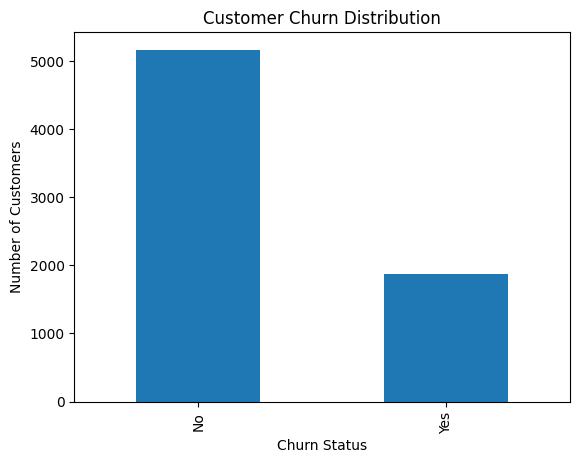

In [29]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Customer Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()

The bar chart illustrates that the majority of customers did not churn, while
approximately one quarter of customers left the service. This visual
representation confirms the moderate class imbalance identified earlier and
highlights the importance of selecting appropriate evaluation metrics during
model development.

### Tenure Distribution by Churn Status

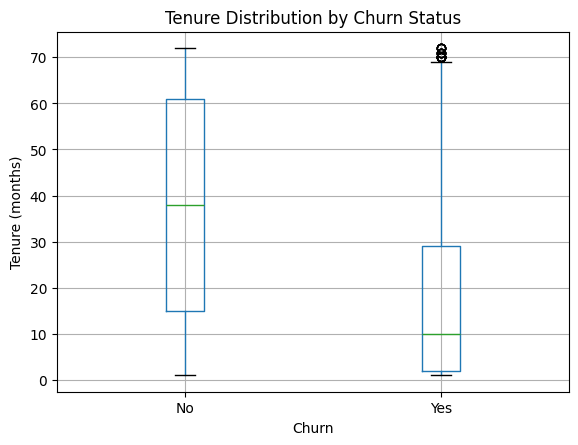

In [30]:
df.boxplot(column="tenure", by="Churn")
plt.title("Tenure Distribution by Churn Status")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.show()

The boxplot shows that customers who churn tend to have significantly lower
tenure compared to those who remain with the provider. This suggests that newer
customers are at higher risk of churn, indicating a potential focus area for
early-stage retention strategies.

## Stage 3: Data Mining / Machine Learning
- Technique(s) used
- Justification
- Model training and validation

Step 3.1 — Define target (y) and features (X)

In [31]:
# Define target variable
y = df["Churn"]

# Define feature set (drop target)
X = df.drop("Churn", axis=1)

X.shape, y.shape

((7032, 20), (7032,))

Step 3.2 — Convert target variable to numeric

In [32]:
# Convert Churn to binary
y = y.map({"Yes": 1, "No": 0})

y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

Step 3.3 — Drop non-predictive identifier

In [33]:
# Drop customerID
X = X.drop("customerID", axis=1)

X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Step 3.4 — Encode categorical variables

In [34]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.shape

(7032, 30)

Step 3.5 — Final sanity check

In [35]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

Following the exploratory analysis and data quality checks performed in Stage 2,
the dataset was prepared for machine learning. The target variable (Churn) was
converted to a binary format, non-predictive identifiers were removed, and
categorical variables were encoded using one-hot encoding. This ensured that
all features were in a suitable numeric format for classification models.

## Stage 4: Evaluation, Recommendations, and Reflection
- Model evaluation
- Business implications
- Limitations and future work
- Ethical, privacy, and security considerations



## References
(UWE Harvard format)